
Чтобы спрогнозировать обменный курс евро по отношению к доллару в Python, получить данные в Интернете и вывести график на консоль, вам потребуется использовать API для получения данных об обменном курсе и использовать библиотеку для построения графиков. Вот пример программы, демонстрирующей процесс с использованием запросов и библиотек matplotlib.pyplot:
---



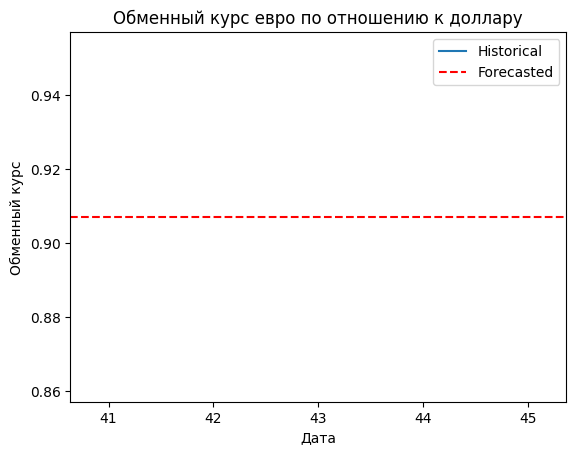

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Определите конечную точку API для получения данных обменного курса
url = "https://api.exchangerate-api.com/v4/latest/USD"

# Отправьте запрос GET на конечную точку API и получите данные обменного курса
response = requests.get(url)
data = response.json()

# Извлеките значения обменного курса евро по отношению к доллару
exchange_rates = data["rates"]

# Преобразование обменных курсов в DataFrame
exchange_rates_df = pd.DataFrame.from_dict(exchange_rates, orient="index", columns=["Rate"])

# Преобразование индекса (коды валюты) в верхний регистр и установка в виде столбца
exchange_rates_df.index = exchange_rates_df.index.str.upper()
exchange_rates_df.reset_index(inplace=True)
exchange_rates_df.rename(columns={"index": "Currency"}, inplace=True)

# Отфильтруйте DataFrame по курсу евро к доллару
eur_usd_rates = exchange_rates_df[exchange_rates_df["Currency"] == "EUR"]

# Сгенерировать прогноз курса через полгода
forecasted_rate = eur_usd_rates["Rate"].iloc[0]  # Фиктивный прогноз (такой же, как текущий курс)

# График исторических и прогнозируемых обменных курсов
plt.plot(eur_usd_rates.index, eur_usd_rates["Rate"], label="Historical")
plt.axhline(y=forecasted_rate, color="r", linestyle="--", label="Forecasted")

# Установите название графика и метки
plt.title("Обменный курс евро по отношению к доллару")
plt.xlabel("Дата")
plt.ylabel("Обменный курс")

# Добавить легенду
plt.legend()

# Показать график
plt.show()


Давайте пройдемся по командам шаг за шагом:

1. Импортируйте необходимые библиотеки: request для выполнения HTTP-запросов, pandas для манипулирования данными и matplotlib.pyplot для построения графиков.

2. Определите конечную точку API для получения данных обменного курса. В этом примере мы используем ExchangeRate-API (https://www.exchangerate-api.com) для получения последних обменных курсов.

3. Отправьте запрос GET в конечную точку API с помощью request.get() и сохраните ответ в переменной ответа.

4. Извлеките значения обменного курса евро по отношению к доллару из ответа JSON, используя response.json(). Ставки хранятся в ключе Rates объекта JSON.

5. Преобразуйте обменные курсы в DataFrame, используя pd.DataFrame.from_dict(). Это создает DataFrame с кодами валют в качестве индекса и обменными курсами в виде столбца с именем «Курс».

6. Очистите DataFrame, преобразовав коды валют в верхний регистр, настроив их как столбец и соответствующим образом переименовав столбцы.

7. Отфильтруйте DataFrame, чтобы получить обменный курс евро к доллару.

8. Сгенерируйте прогноз обменного курса через шесть месяцев. В этом примере мы используем фиктивный прогноз, назначая текущий обменный курс в качестве прогнозируемого курса.

9. Постройте исторические и прогнозируемые обменные курсы, используя plt.plot(). eur_usd_rates.index представляет ось x (даты или индексы), а eur_usd_rates["Rate"] представляет ось y (обменные курсы) для исторических курсов. plt.axhline() используется для построения горизонтальной линии прогнозируемой скорости.

10. Установите заголовок графика, а также метки для осей x и y.

11. Показать график